In [12]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import sklearn.model_selection
import matplotlib.pyplot as plt
# Set svg format
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [7]:
df = pd.read_csv('iris.csv')
print(df.head())
print(df.size)
print(df.shape)

   sepal_length  sepal_width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
750
(150, 5)


In [8]:
target = 'class'
print(df[target].value_counts())
df.loc[df[target] == 'Iris-setosa', target] = 0
df.loc[df[target] == 'Iris-versicolor', target] = 1
df.loc[df[target] == 'Iris-virginica', target] = 2

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


In [9]:
X = np.array(df.drop(labels = [target], axis = 1))
y = np.array(df[target])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

In [10]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
accuracy = linear.score(x_test, y_test)
print('Accuracy:', accuracy)
predictions = linear.predict(x_test)

Accuracy: 0.9402155470731806


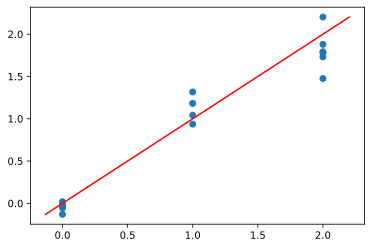

In [13]:
p1 = max(max(y_test), max(predictions))
p2 = min(min(y_test), min(predictions))
plt.scatter(y_test, predictions)
plt.plot([p1, p2], [p1, p2], color = 'red')
plt.show()

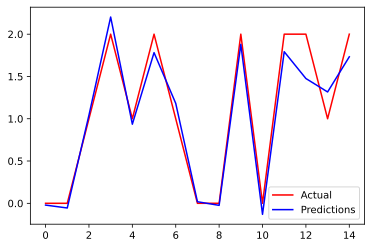

In [15]:
x_c = np.arange(len(predictions))
plt.plot(x_c, y_test, label = 'Actual', color = 'red')
plt.plot(x_c, predictions, label = 'Predictions', color = 'blue')
plt.legend()
plt.show()